In [1]:
%matplotlib notebook
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
import scipy.stats as st

In [2]:
input_path = os.path.join("..","Clean_Data")
output_path = os.path.join("..","Graphs")
min_games_played = 16

In [3]:
complete_df = pd.read_csv(input_path +'/total_players.csv')
display(complete_df.sort_values(by='nameFull'))

,playerId,nameFull,position,teamId,gameId,fumbles,interceptions,sacks,#players-pos-league,#games-pos-league,#fumbles-pos-league,#int-pos-league,#sacks-pos-league
2304,20160046.0,A'Shawn Robinson,DT,1540.0,91.0,NaN,4.0,8.0,580.0,37418.0,2.0,88.0,3901.0
1027,20130717.0,A.J. Bouye,DB,2120.0,134.0,NaN,34.0,4.0,1104.0,51097.0,283.0,3715.0,841.0
2573,20130717.0,A.J. Bouye,DB,2250.0,134.0,NaN,34.0,4.0,1104.0,51097.0,283.0,3715.0,841.0
3510,20190911.0,A.J. Cole,P,2520.0,4.0,1.0,NaN,NaN,2.0,8.0,1.0,0.0,0.0
206,20100119.0,A.J. Edds,LB,3430.0,8.0,NaN,NaN,NaN,867.0,41106.0,32.0,874.0,4707.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
688,20140900.0,NaN,NaN,2510.0,16.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1444,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1797,20170455.0,NaN,NaN,325.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2257,20160983.0,NaN,NaN,2510.0,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


-----What is the worst defensively team?

First we get the total games in the last five years of information per team

In [4]:
games = pd.read_csv('../../Resources/games.csv')
games = games[games['season']>=2014]
games_home = games[['gameId','homeTeamId']]
games_home = games_home.groupby('homeTeamId').count()
games_home = games_home.reset_index().rename(columns={'homeTeamId':'teamId'})
# display(games_home)
games_visit = games[['gameId','visitorTeamId']]
games_visit = games_visit.groupby('visitorTeamId').count()
games_visit = games_visit.reset_index().rename(columns={'visitorTeamId':'teamId'})
# display(games_visit)
games_total = pd.DataFrame.merge(games_home,games_visit,how='left',on='teamId')
games_total['total_games'] = games_total['gameId_x'] + games_total['gameId_y']
games_total = games_total[['teamId','total_games']]
display(games_total)

,teamId,total_games
0,200,126
1,325,125
2,610,123
3,750,126
4,810,121
5,920,122
6,1050,120
7,1200,125
8,1400,125
9,1540,122


Then we get the average number of each plays per team

In [5]:
team_plays = complete_df[['playerId','nameFull','position','teamId','gameId','fumbles','interceptions','sacks']]
team_plays = team_plays.groupby('teamId').sum()
team_plays = team_plays.reset_index()
team_plays = pd.DataFrame.merge(team_plays,games_total,how='left',on='teamId')
team_plays = team_plays[['teamId','total_games','fumbles','interceptions','sacks']]
team_plays['total_defensive_plays'] = team_plays['fumbles'] + team_plays['interceptions'] + team_plays['sacks']
team_plays['avg_fumbles'] = team_plays['fumbles'] / team_plays['total_games']
team_plays['avg_interceptions'] = team_plays['interceptions'] / team_plays['total_games']
team_plays['avg_sacks'] = team_plays['sacks'] / team_plays['total_games']
team_plays['avg_total_plays'] = team_plays['total_defensive_plays'] / team_plays['total_games']
average_team_stats = team_plays[['teamId','avg_fumbles','avg_interceptions','avg_sacks','avg_total_plays']]
average_team_stats

,teamId,avg_fumbles,avg_interceptions,avg_sacks,avg_total_plays
0,200.0,0.174603,1.222222,3.587302,4.984127
1,325.0,0.144000,2.056000,5.232000,7.432000
2,610.0,0.373984,2.292683,4.739837,7.406504
3,750.0,0.063492,1.730159,5.785714,7.579365
4,810.0,0.066116,1.462810,5.041322,6.570248
5,920.0,0.221311,1.286885,3.860656,5.368852
6,1050.0,0.133333,2.541667,6.225000,8.900000
7,1200.0,0.056000,1.680000,4.888000,6.624000
8,1400.0,0.112000,1.256000,4.488000,5.856000
9,1540.0,0.139344,1.663934,6.040984,7.844262


Then we get the total negative points recieved by each team

In [6]:
points_per_team = pd.read_csv(input_path +'/points_x_team.csv')
display(points_per_team)

,teamId,visitingTeamFinalScore,homeTeamFinalScore,total_points
0,200,23.062500,23.225806,23.144153
1,325,17.349206,20.741935,19.045571
2,610,20.459016,20.741935,20.600476
3,750,20.920635,24.571429,22.746032
4,810,20.770492,23.066667,21.918579
5,920,21.704918,21.803279,21.754098
6,1050,22.183333,24.233333,23.208333
7,1200,21.843750,20.295082,21.069416
8,1400,19.062500,20.278689,19.670594
9,1540,22.100000,22.403226,22.251613


Finally we merge the results in a single DF

In [7]:
team_stats = pd.DataFrame.merge(team_plays,points_per_team,how='left',on='teamId')
comparison_team_stats = team_stats[['teamId','avg_fumbles','avg_interceptions','avg_sacks','avg_total_plays','total_points']]
display(comparison_team_stats.sort_values(by='total_points'))

,teamId,avg_fumbles,avg_interceptions,avg_sacks,avg_total_plays,total_points
20,3200.0,0.125926,1.948148,6.429630,8.503704,18.742857
19,3000.0,0.293651,1.341270,3.738095,5.373016,18.904762
1,325.0,0.144000,2.056000,5.232000,7.432000,19.045571
29,4600.0,0.115385,1.653846,6.261538,8.030769,19.652699
8,1400.0,0.112000,1.256000,4.488000,5.856000,19.670594
15,2310.0,0.147287,1.713178,5.883721,7.744186,20.370607
2,610.0,0.373984,2.292683,4.739837,7.406504,20.600476
26,3900.0,0.039370,1.629921,4.464567,6.133858,20.898313
7,1200.0,0.056000,1.680000,4.888000,6.624000,21.069416
12,2120.0,0.144000,2.304000,4.200000,6.648000,21.544419


We graph the average plays vs the negative points recieved per team, searching for a tendence

<IPython.core.display.Javascript object>


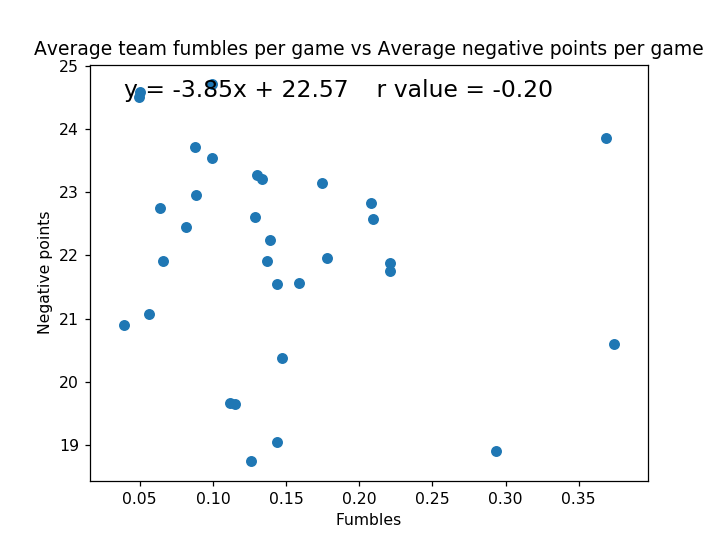

<IPython.core.display.Javascript object>


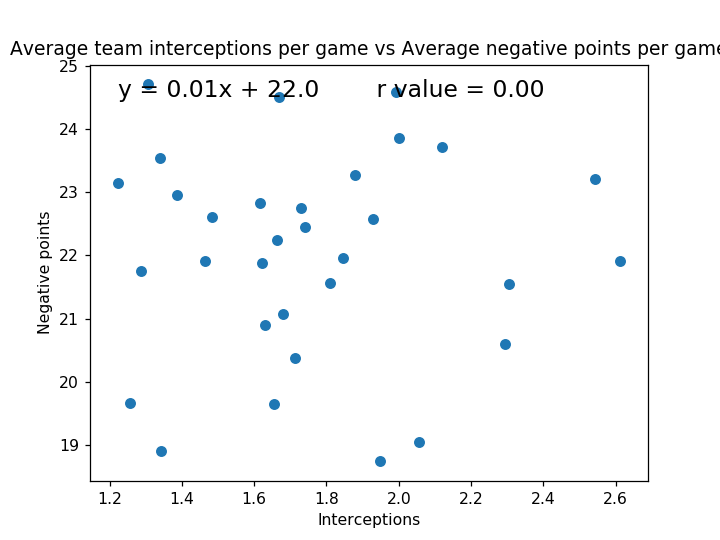

<IPython.core.display.Javascript object>


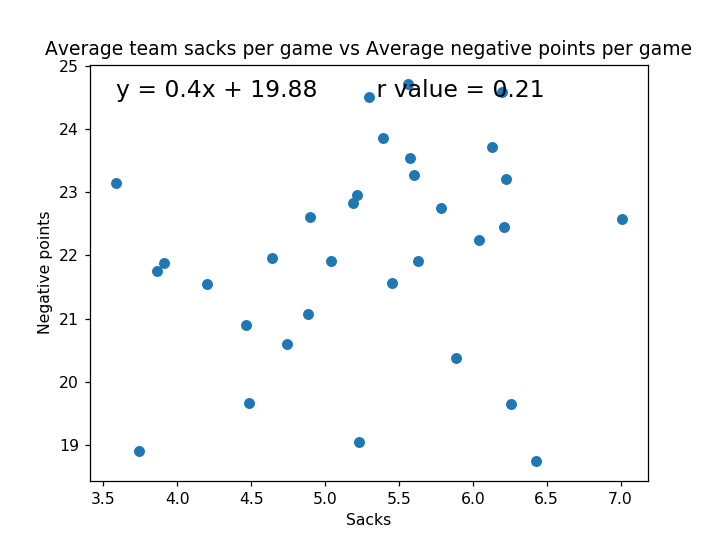

<IPython.core.display.Javascript object>


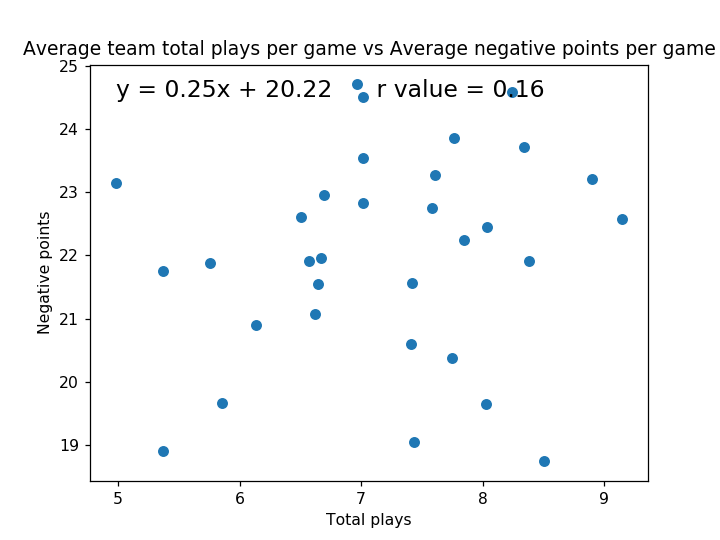

In [8]:
plays = ['avg_fumbles','avg_interceptions','avg_sacks','avg_total_plays']

for play in plays:
    fig, ax = plt.subplots()
    ax.scatter(comparison_team_stats[play], comparison_team_stats['total_points'] ) 
    (slope, intercept, rvalue, pvalue, stderr) = st.linregress(comparison_team_stats[play], comparison_team_stats['total_points'])
    regress_values = comparison_team_stats['total_points'] * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    rval=f' r value = {"{:.2f}".format(rvalue)}'
    midx=comparison_team_stats[play].min()+((comparison_team_stats[play].max()-comparison_team_stats[play].min())/2)
    plt.annotate(line_eq,(comparison_team_stats[play].min(),24.5),fontsize=15,color="black")
    plt.annotate(rval,(midx,24.5),fontsize=15,color="black")
    if play == 'avg_fumbles':
        label = 'fumbles'
    elif play == 'avg_interceptions':
        label = 'interceptions'
    elif play == 'avg_sacks':
        label = 'sacks'
    elif play == 'avg_total_plays':
        label = 'total plays'
    ax.set(xlabel=label.capitalize(), ylabel='Negative points')
    ax.set_title(f'Average team {label} per game vs Average negative points per game')
    fig.savefig(f'../Graphs/{play}_vs_pergame')
    plt.show()

We tried to prove our Hypothesis which is "The reason for the Intercepts data, Fumbles data and Sacks data affects the defense level" but instead we proved the Null Hypothesis "The reason for the Intercepts data, Fumbles data and Sacks data doesn't affects the defense level"

In [9]:
display(comparison_team_stats.sort_values(by='avg_total_plays',ascending=True).reset_index().head(1))
team = comparison_team_stats['teamId'][0]

,index,teamId,avg_fumbles,avg_interceptions,avg_sacks,avg_total_plays,total_points
0,0,200.0,0.174603,1.222222,3.587302,4.984127,23.144153


After comparing the number of total average plays of each team the one that has the worst total of average defensive plays is the team withe the teamId "200" which is the Atlanta Falcons

-----Which are the positions involved in Fumbles, Interceptions and Sacks?

First we get the average plays per game for every player 

In [10]:
players_stats = complete_df[['playerId','nameFull','position','teamId','gameId','fumbles','interceptions','sacks']]
players_stats['avg_player_fumbles']=players_stats['fumbles']/players_stats['gameId']
players_stats['avg_player_interceptions']=players_stats['interceptions']/players_stats['gameId']
players_stats['avg_player_sacks']=players_stats['sacks']/players_stats['gameId']
players_stats = players_stats[['playerId','nameFull','position','teamId','gameId','avg_player_fumbles','avg_player_interceptions','avg_player_sacks']]
players_stats = players_stats.rename(columns={'gameId':'games_played'})
players_stats = players_stats.dropna(how='all').drop_duplicates(subset='nameFull',keep='last')
display(players_stats)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

,playerId,nameFull,position,teamId,games_played,avg_player_fumbles,avg_player_interceptions,avg_player_sacks
0,20130105.0,Duke Williams,S,610.0,42.0,NaN,0.047619,NaN
3,20110818.0,Mario Butler,DB,610.0,6.0,NaN,NaN,NaN
4,20090182.0,Jarius Wynn,DE,610.0,32.0,NaN,NaN,0.250000
6,20120578.0,Bobby Felder,DB,610.0,6.0,NaN,NaN,NaN
9,20100166.0,Stevenson Sylvester,LB,610.0,6.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
3884,20130054.0,Jamar Taylor,DB,200.0,174.0,NaN,0.011494,0.022989
3885,20130057.0,D.J. Swearinger,S,3300.0,145.0,0.006897,0.137931,0.041379
3886,20170118.0,Mack Hollins,WR,2700.0,2.0,NaN,NaN,NaN
3887,20170172.0,Isaiah McKenzie,WR,610.0,2.0,5.000000,NaN,NaN


Then we compare the average plays for each position involved with the league avrage

In [11]:
plays=['fumbles','interceptions','sacks']
by_position_graphs = players_stats[players_stats['games_played']>=min_games_played]
position_counts = by_position_graphs.groupby('position').count().reset_index().rename(columns={'playerId':'positionCounts'}).drop(columns={'nameFull','teamId','games_played'})
# display(position_counts)
for play in plays:
    globals()['by_position_%s' % play] = by_position_graphs.groupby('position').mean().reset_index()
#     display( globals()['by_position_%s' % play] )
    globals()['by_position_%s' % play] = globals()['by_position_%s' % play][['position',f'avg_player_{play}']]
#     display(globals()['by_position_%s' % play])
    globals()['by_position_%s' % play][f'avg_league_{play}'] = globals()['by_position_%s' % play][f'avg_player_{play}'].mean()
#     display(position_counts[position_counts[f'avg_player_{play}']>=20][['position']])
    globals()['by_position_%s' % play] = pd.DataFrame.merge(position_counts[['position']][position_counts[f'avg_player_{play}']>=20],globals()['by_position_%s' % play],how='left',on='position')
    display(globals()['by_position_%s' % play])

,position,avg_player_fumbles,avg_league_fumbles
0,DB,0.055658,0.025238
1,LB,0.025310,0.025238
2,S,0.025142,0.025238


,position,avg_player_interceptions,avg_league_interceptions
0,DB,0.101011,0.065076
1,DE,0.032428,0.065076
2,DT,0.036155,0.065076
3,LB,0.060181,0.065076
4,S,0.094739,0.065076


,position,avg_player_sacks,avg_league_sacks
0,DB,0.055054,0.156635
1,DE,0.257991,0.156635
2,DL,0.122405,0.156635
3,DT,0.141607,0.156635
4,LB,0.143439,0.156635
5,OLB,0.166259,0.156635
6,S,0.064642,0.156635


Graphs that compares the position plays for every single play of interest (Fumbles, Interceptions and Sacks) vs the league average

<IPython.core.display.Javascript object>


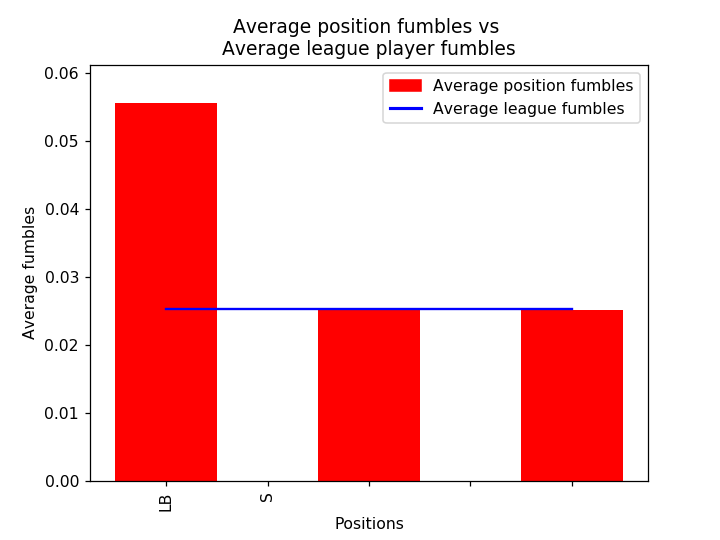

<IPython.core.display.Javascript object>


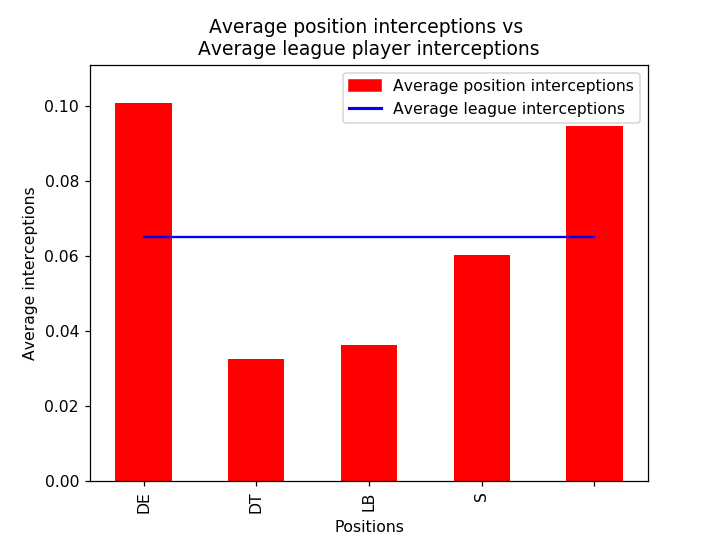

<IPython.core.display.Javascript object>


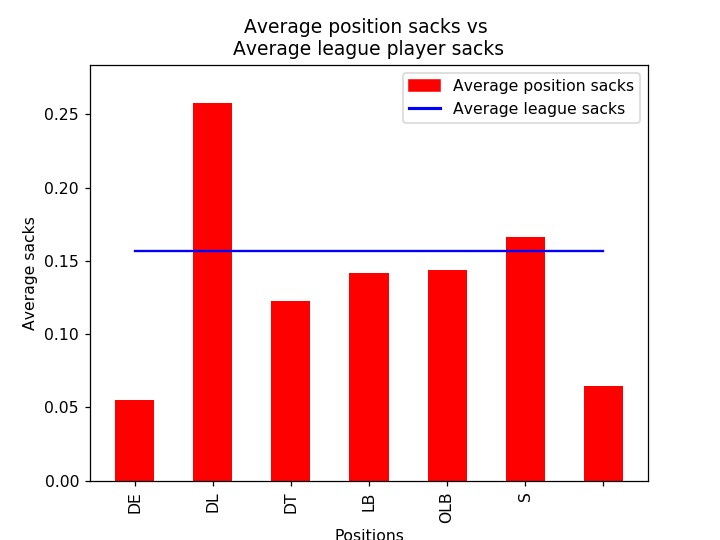

In [12]:
width=0.5
plays=['fumbles','interceptions','sacks']
for play in plays:
    fig, ax = plt.subplots()
    x = np.arange(len(globals()['by_position_%s' % play][f'avg_player_{play}']))
    legend_elements = [Patch(facecolor='r', edgecolor='r',label=f'Average position {play}'),Line2D([0], [0], color='b', lw=2, label=f'Average league {play}')]
    position = ax.bar(x, globals()['by_position_%s' % play][f'avg_player_{play}'], width,color='r')
    league = ax.plot(x, globals()['by_position_%s' % play][f'avg_league_{play}'], width,color='b')
    ax.set_xticklabels(globals()['by_position_%s' % play]['position'],rotation=90)
    ax.set_ylabel(f'Average {play}')
    ax.set_title(f'Average position {play} vs \nAverage league player {play}')
    ax.set_xlabel('Positions')
    ax.set_ylim(0,(globals()['by_position_%s' % play][f'avg_player_{play}'].max())*1.1)
    ax.legend(handles=legend_elements,loc='best')
    fig.savefig(f'../Graphs/avg_position_{play}_vs_avg_league_{play}')
    plt.show()

We calculate get the most important plays for each play of interest by ordering them by the difference with the league average

In [13]:
positions_to_compare = 3
plays = ['fumbles','interceptions','sacks']
lists = []
for play in plays:
    print(play)
    globals()['positions_%s' % play] = globals()['by_position_%s' % play][['position',f'avg_player_{play}',f'avg_league_{play}']]
    globals()['positions_%s' % play]['difference'] = globals()['positions_%s' % play][f'avg_player_{play}']-globals()['positions_%s' % play][f'avg_league_{play}']
    globals()['positions_%s' % play] = globals()['positions_%s' % play][['position','difference']].sort_values(by='difference',ascending=False).reset_index()
    globals()['important_positions_%s' % play] = globals()['positions_%s' % play].head(3).drop(columns={'index'})
    lists.append(globals()['important_positions_%s' % play])
    display(globals()['important_positions_%s' % play])

fumbles


,position,difference
0,DB,0.030420
1,LB,0.000072
2,S,-0.000096


interceptions


,position,difference
0,DB,0.035935
1,S,0.029663
2,LB,-0.004896


sacks


,position,difference
0,DE,0.101356
1,OLB,0.009625
2,LB,-0.013196


Results: 
The most important positions for fumbles: DB, LB, S
The most important positions for interceptions: DB, LB, S
The most important positions for sacks: DE, OLB, LB

-----Which players are in that positions?

We calculate the average plays for the important positions for each play of interest against the league average of the position

In [14]:
results = []
for lista in lists:
    if lista.equals(important_positions_fumbles):
        table = "fumbles"
    elif lista.equals(important_positions_interceptions):
        table = "interceptions"
    elif lista.equals(important_positions_sacks):
        table = "sacks"
    pos1=lista['position'][0]
    pos2=lista['position'][1]
    pos3=lista['position'][2]
    
    team_player_stats = players_stats[(players_stats['teamId']==team)&(players_stats['games_played']>=min_games_played)&((players_stats['position']==pos1)|(players_stats['position']==pos2)|(players_stats['position']==pos3))]
#     display(team_player_stats.head())
    team_player_stats = team_player_stats[['position',f'avg_player_{table}']]
    team_player_stats = team_player_stats.rename(columns={f'avg_player_{table}':f'avg_team_{table}'})
#     display(team_player_stats.head())
    globals()['by_position_team_graphs_%s' % table] =  team_player_stats[['position',f'avg_team_{table}']]
#     display(globals()['by_position_team_graphs_%s' % table])
    globals()['by_position_team_graphs_%s' % table] = globals()['by_position_team_graphs_%s' % table].groupby('position').mean().reset_index()
#     display(globals()['by_position_team_graphs_%s' % table])
    globals()['by_position_team_graphs_%s' % table] = pd.DataFrame.merge(lista[['position']],globals()['by_position_team_graphs_%s' % table],how='left',on='position')
    globals()['by_position_team_graphs_%s' % table] = pd.DataFrame.merge(globals()['by_position_team_graphs_%s' % table],globals()['by_position_%s' % table][['position',f'avg_player_{table}']],how='left',on='position')
    globals()['by_position_team_graphs_%s' % table] = globals()['by_position_team_graphs_%s' % table].rename(columns={f'avg_player_{table}':f'avg_league_{table}'})
    display(globals()['by_position_team_graphs_%s' % table])
    results.append(globals()['by_position_team_graphs_%s' % table])   

,position,avg_team_fumbles,avg_league_fumbles
0,DB,0.085032,0.055658
1,LB,NaN,0.025310
2,S,NaN,0.025142


,position,avg_team_interceptions,avg_league_interceptions
0,DB,0.074604,0.101011
1,S,0.051282,0.094739
2,LB,0.190476,0.060181


,position,avg_team_sacks,avg_league_sacks
0,DE,0.215925,0.257991
1,OLB,0.071244,0.166259
2,LB,0.061108,0.143439


Graphs to visualize the difference of the teams important positions average plays vs the league important positions average plays for each of the plays of interest

<IPython.core.display.Javascript object>


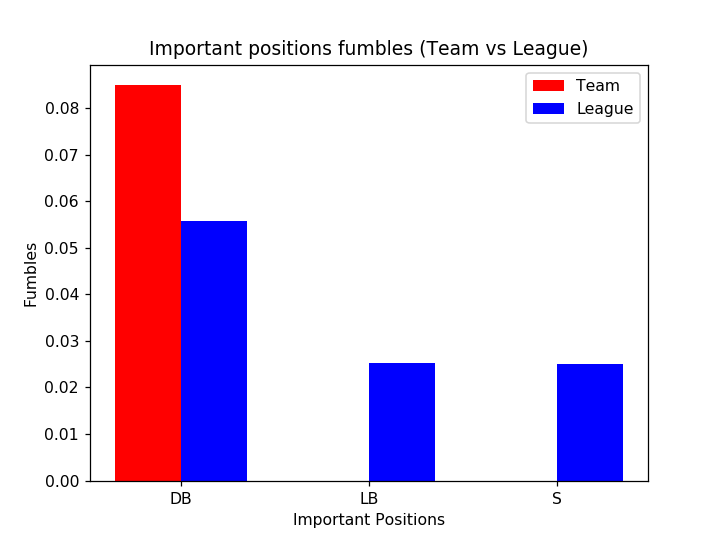

<IPython.core.display.Javascript object>


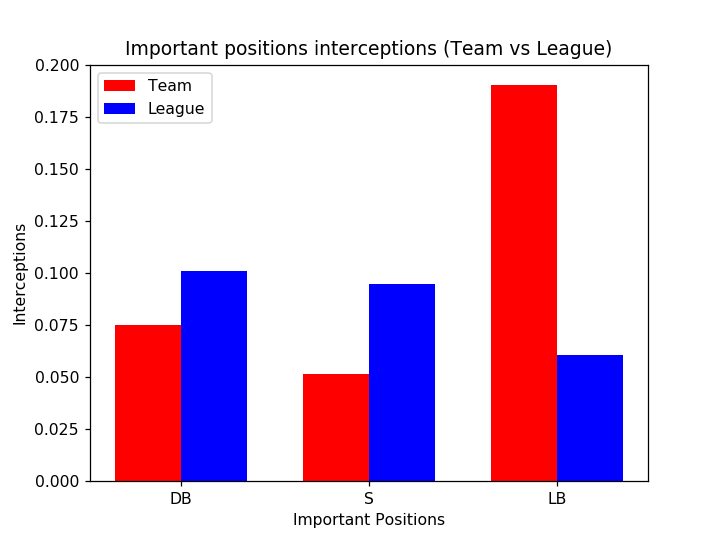

<IPython.core.display.Javascript object>


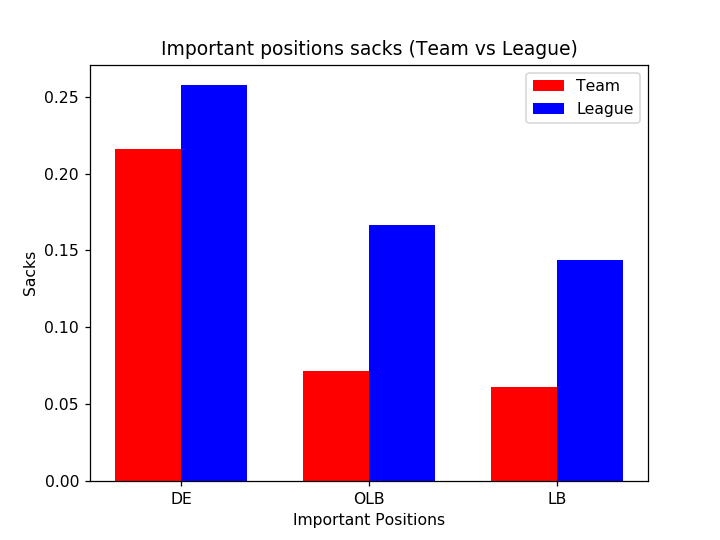

In [15]:
for result in results:
    if result.equals(by_position_team_graphs_fumbles):
        table = "fumbles"
    elif result.equals(by_position_team_graphs_interceptions):
        table = "interceptions"
    elif result.equals(by_position_team_graphs_sacks):
        table = "sacks"
    x = np.arange(len(globals()['by_position_team_graphs_%s' % table]['position']))
    width = 0.35
    fig, ax = plt.subplots()
    team_s = ax.bar(x - width/2, globals()['by_position_team_graphs_%s' % table][f'avg_team_{table}'], width,label='Team',color='r')
    league = ax.bar(x + width/2, globals()['by_position_team_graphs_%s' % table][f'avg_league_{table}'], width,label='League',color='b')
    ax.set_ylabel(f'{table.capitalize()}')
    ax.set_title(f'Important positions {table} (Team vs League)')
    ax.set_xticks(x)
    ax.set_xticklabels(globals()['by_position_team_graphs_%s' % table]['position'])
    ax.set_xlabel('Important Positions')
    ax.legend()
    plt.show()
    fig.savefig(f'../Graphs/Important_positions_{table}_Team_vs_League)')

We calculate the most critial position in the team for each of the plays of interest

In [16]:
positions_to_compare = 1
critical_positions = []
for result in results:
    if result.equals(by_position_team_graphs_fumbles):
        table = "fumbles"
    elif result.equals(by_position_team_graphs_interceptions):
        table = "interceptions"
    elif result.equals(by_position_team_graphs_sacks):
        table = "sacks"
    globals()['by_position_team_graphs_%s' % table][f'{table}_difference'] = globals()['by_position_team_graphs_%s' % table][f'avg_team_{table}'].fillna(0) - globals()['by_position_team_graphs_%s' % table][f'avg_league_{table}']
    globals()['by_position_team_graphs_%s' % table] = globals()['by_position_team_graphs_%s' % table][['position',f'{table}_difference']].sort_values(by=f'{table}_difference').reset_index()
    
    display(globals()['by_position_team_graphs_%s' % table])
    critical_positions.append(globals()['by_position_team_graphs_%s' % table]['position'][0])
plays=['fumbles','interceptions','sacks']
recommendations = pd.DataFrame(list(zip(plays, critical_positions)),columns =['Plays', 'Positions']) 
display(recommendations)

,index,position,fumbles_difference
0,1,LB,-0.025310
1,2,S,-0.025142
2,0,DB,0.029375


,index,position,interceptions_difference
0,1,S,-0.043457
1,0,DB,-0.026408
2,2,LB,0.130295


,index,position,sacks_difference
0,1,OLB,-0.095016
1,2,LB,-0.082330
2,0,DE,-0.042066


,Plays,Positions
0,fumbles,LB
1,interceptions,S
2,sacks,OLB


We present the comparison of the 3 best player outside the team of interest that have the best stats for each position and play of interest and the 3 best player in the team of interest that have the best stats for each position and play of interest

,playerId,nameFull,teamId,position,games_played,avg_player_fumbles
3485,20190784.0,Ketner Kupp,2510.0,LB,16.0,0.062500
1075,20080410.0,Patrick Bailey,2100.0,LB,18.0,0.055556
828,20060033.0,DeMeco Ryans,3700.0,LB,22.0,0.045455


,playerId,nameFull,teamId,position,games_played,avg_player_fumbles
610,20130415.0,Joplo Bartu,200.0,LB,40.0,NaN
1933,20170432.0,Jermaine Grace,200.0,LB,21.0,NaN
1941,20120035.0,Courtney Upshaw,200.0,LB,142.0,NaN


<IPython.core.display.Javascript object>


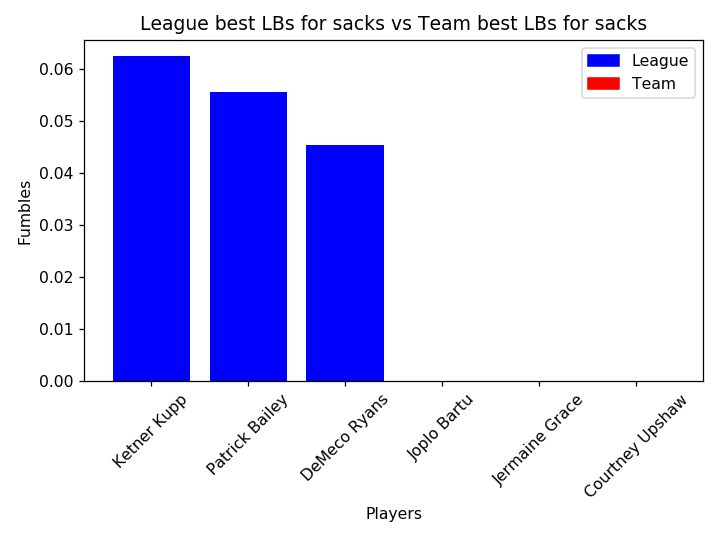

,playerId,nameFull,teamId,position,games_played,avg_player_interceptions
698,20140673.0,Pierre Warren,3300.0,S,20.0,0.300000
1650,20170042.0,Marcus Williams,3300.0,S,104.0,0.298077
3753,20180011.0,Minkah Fitzpatrick,3900.0,S,38.0,0.263158


,playerId,nameFull,teamId,position,games_played,avg_player_interceptions
2479,20160017.0,Keanu Neal,200.0,S,78.0,0.051282
612,20090055.0,William Moore,200.0,S,22.0,NaN
3770,20130033.0,Johnathan Cyprien,200.0,S,196.0,NaN


<IPython.core.display.Javascript object>


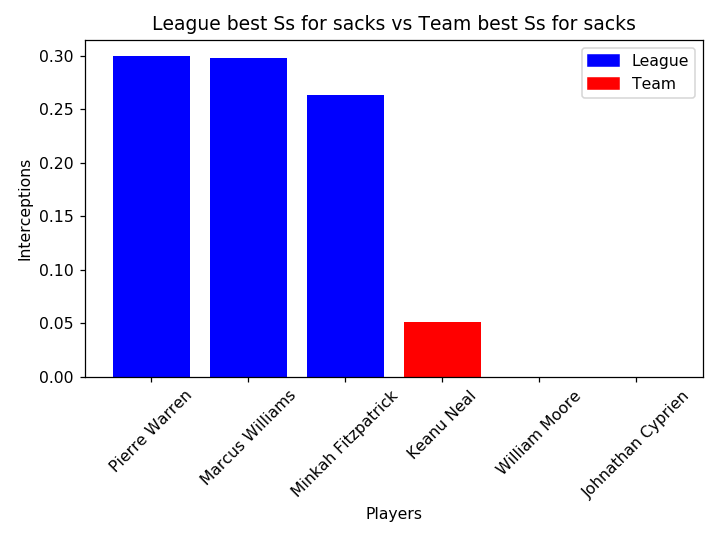

,playerId,nameFull,teamId,position,games_played,avg_player_sacks
1821,20160009.0,Leonard Floyd,810.0,OLB,69.0,0.536232
3071,20150058.0,Markus Golden,3410.0,OLB,64.0,0.515625
2515,20150022.0,Bud Dupree,3900.0,OLB,99.0,0.515152


,playerId,nameFull,teamId,position,games_played,avg_player_sacks
1944,20160115.0,De'Vondre Campbell,200.0,OLB,107.0,0.121495
592,20140139.0,Prince Shembo,200.0,OLB,38.0,0.052632
1945,20160052.0,Deion Jones,200.0,OLB,101.0,0.039604


<IPython.core.display.Javascript object>


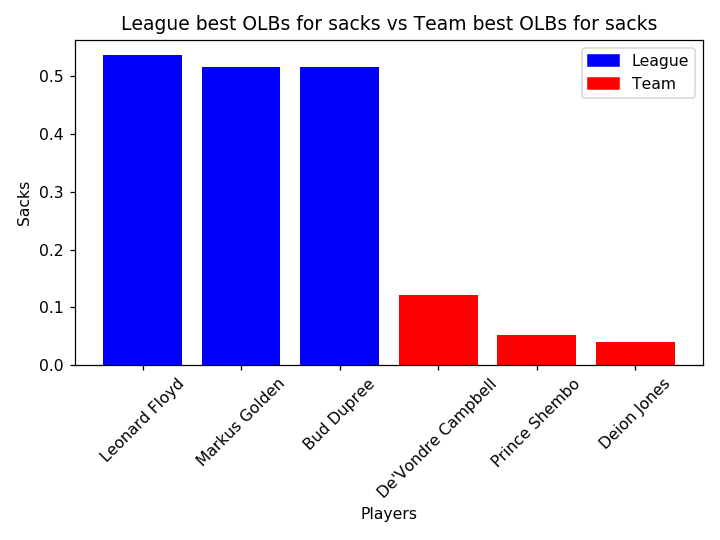

In [17]:
legend_elements = [Patch(facecolor='b', edgecolor='b',label='League'),Patch(facecolor='r', edgecolor='r',label='Team')]
for x in range(0,3):
    position = recommendations['Positions'][x]
    play = recommendations['Plays'][x]
    recommended_players = players_stats[(players_stats['games_played']>=min_games_played)&(players_stats['teamId']!=team)&(players_stats['position']==position)]
    recommended_players = recommended_players[['playerId','nameFull','teamId','position','games_played',f'avg_player_{play}']].sort_values(by=f'avg_player_{play}',ascending=False).head(3)
    actual_players = players_stats[(players_stats['games_played']>=min_games_played)&(players_stats['teamId']==team)&(players_stats['position']==position)]
    actual_players = actual_players[['playerId','nameFull','teamId','position','games_played',f'avg_player_{play}']].sort_values(by=f'avg_player_{play}',ascending=False).head(3)
    display(recommended_players)
    display(actual_players)
    frames = [recommended_players,actual_players]
    players_comparison = pd.concat(frames).fillna(0)
    x = np.arange(len(players_comparison['nameFull']))
    fig, ax = plt.subplots()
    league = ax.bar(x, players_comparison[f'avg_player_{play}'],color=['b','b','b','r','r','r'])
    ax.set_ylabel(f'{play.capitalize()}')
    ax.set_title(f'League best {position}s for {table} vs Team best {position}s for {table}')
    ax.set_xticks(x)
    ax.set_xticklabels(players_comparison[f'nameFull'],rotation= 45)
    ax.set_xlabel('Players')
    fig.tight_layout()
    ax.legend(handles=legend_elements,loc='best')
    fig.savefig(f'../Graphs/League_best_{position}s_for_{table}_vs_Team_best_{position}s_for_{table}')
    plt.show()